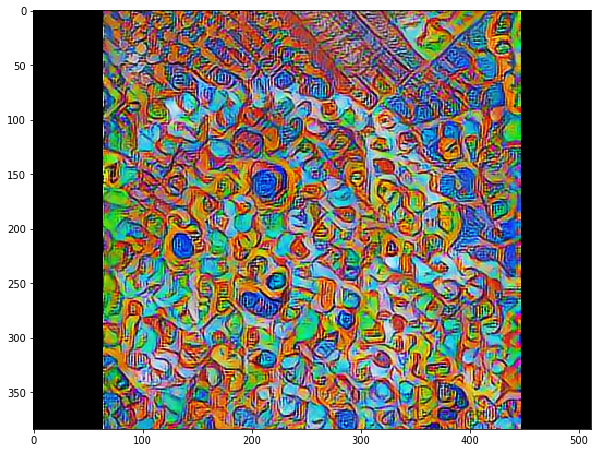

In [3]:
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

path = 'C:\\Users\\timjd\Documents\\GitHub\\Image_Styling\\Sophomore Project\\static\\images'
content_path = os.path.join(path + '\\Teddy.jpg' )
style_path = os.path.join(path + '\\Colorful.jpg' )

#this function converts from tensor to image
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

#this function loads the image into the proper dimensions for the stylization to work
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img
content_image = load_img(content_path)
style_image = load_img(style_path)

#taking the image and styling it
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

#plotting the image
plt.figure(figsize=(10,10))
plt.imshow(tensor_to_image(stylized_image).rotate(90))
plt.show()


In [2]:
tf.executing_eagerly()

True

In [6]:
import sys
print(sys.executable)

C:\Users\timjd\Anaconda3\envs\tensorflow\python.exe
